# genQC &middot; Generative Quantum Circuits

> Generating quantum circuits with diffusion models

<p align="left">
  <a><img src="https://badgen.net/badge/icon/awesome?icon=awesome&label" alt="awesome"></a>
  <a><img src="https://badgen.net/badge/generative/models/orange" alt="generative-models"></a>
  <a><img src="https://badgen.net/badge/diffusion/models/pink" alt="diffusion-models"></a>
  <a><img src="https://img.shields.io/badge/python-3.9-red" alt="python-3.9"></a>
</p>

Code repository for generating quantum circuits with diffusion models. [[Paper]](https://arxiv.org/abs/2311.02041) [[Demo]](https://huggingface.co/spaces/Floki00/genQC)

![](https://github.com/FlorianFuerrutter/genQC/blob/main/src/assets/inference.png?raw=true)

## The codebase

All weights and functions are contained within this repo. For the CLIP model weights we use the [OpenCLIP](https://github.com/mlfoundations/open_clip) library, which will download (and cache) the CLIP model on first usage of our pipeline. In case you prefer reading a documentation rather than notebooks or code see [[Documentation]](https://florianfuerrutter.github.io/genQC/).

The repo inlcudes:

1. `saves/` the configs and weights of the pre-trained models.
2. `genQC/` a full release of our used diffusion pipeline.
3. `src/examples` examples how to reproduce some figures of the [Paper](https://arxiv.org/abs/2311.02041).
4. `src/` the source notebooks for [nbdev](https://github.com/fastai/nbdev).

## Examples

#### Minimal example

A minimal example to generate a 5 qubit circuit conditioned on a SRV of $[1,1,1,2,2]$. You can try it out on your own with our demo [[huggingface-space]](https://huggingface.co/spaces/Floki00/genQC), no coding required.

In [ ]:
from genQC.pipeline.diffusion_pipeline import DiffusionPipeline
from genQC.inference.infer_srv import generate_srv_tensors, convert_tensors_to_srvs

model_path = "../saves/qc_unet_config_SRV_3to8_qubit/"
pipeline   = DiffusionPipeline.from_config_file(model_path, "cpu")  
pipeline.scheduler.set_timesteps(20) 

out_tensor           = generate_srv_tensors(pipeline, "Generate SRV: [1,1,1,2,2]", samples=1, system_size=5, num_of_qubits=5, max_gates=16, g=7.5) 
qc_list, _, svr_list = convert_tensors_to_srvs(out_tensor, pipeline.gate_pool)

[INFO]: `genQC.models.unet_qc.QC_Cond_UNet` instantiated from given config on cpu.
[INFO]: `genQC.models.frozen_open_clip.CachedFrozenOpenCLIPEmbedder` instantiated from given config on cpu.
[INFO]: `genQC.models.frozen_open_clip.CachedFrozenOpenCLIPEmbedder`. No save_path` provided. No state dict loaded.


is SRV [1, 1, 1, 2, 2]


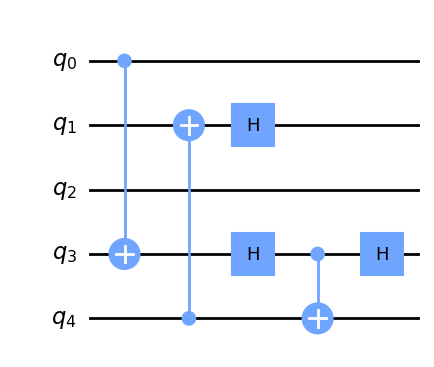

In [ ]:
print(f"is SRV {svr_list[0]}")
qc_list[0].draw("mpl", style="clifford")

#### Included examples

Example notebooks are provided in the directory `src/examples/`.

- `0_hello_circuit` [[doc]](https://florianfuerrutter.github.io/genQC/examples/hello_circuit.html) [[notebook]](https://github.com/FlorianFuerrutter/genQC/blob/main/src/examples/0_hello_circuit.ipynb): How to sample a circuit (conditioned on a SRV)
- `1_editing_and_masking` [[doc]](https://florianfuerrutter.github.io/genQC/examples/editing_and_masking.html) [[notebook]](https://github.com/FlorianFuerrutter/genQC/blob/main/src/examples/1_editing_and_masking.ipynb): Presents editing and masking of circuits
- `2_unitary_compilation` [[doc]](https://florianfuerrutter.github.io/genQC/examples/unitary_compilation.html) [[notebook]](https://github.com/FlorianFuerrutter/genQC/blob/main/src/examples/2_unitary_compilation.ipynb): Compile unitaries and transpile circuits
- `3_dataset_and_fineTune` [[doc]](https://florianfuerrutter.github.io/genQC/examples/dataset_and_fineTune.html) [[notebook]](https://github.com/FlorianFuerrutter/genQC/blob/main/src/examples/3_dataset_and_fineTune.ipynb): How to create a dataset and fine-tune a pre-trained model

## Installation

The installation of genQC is done via `pip` within a few minutes, depending on your downloading speed.

#### 1. Clone the repository

```sh
git clone https://github.com/FlorianFuerrutter/genQC.git
cd genQC
```

#### 2. Install genQC

This library is build using jupyter notebooks and [nbdev](https://github.com/fastai/nbdev). To install the library use in the clone directory:

```sh
pip install -e .
```

Note, this will install missing requirements automatically. You may want to install some of them manually beforehand, e.g. pytorch for specific cuda support, see [pytorch.org/get-started/locally](https://pytorch.org/get-started/locally/).

**Requirements:** `genQC` depends on `python` (min. version 3.9) and the librarys: `torch`, `numpy`, `matplotlib`, `scipy`, `pandas`, `omegaconf`, `qiskit`, `tqdm`, `joblib`, `open_clip_torch`, `ipywidgets` and `pylatexenc`. All can be installed with `pip`. In `src/RELEASES.md` [[doc]](https://florianfuerrutter.github.io/genQC/RELEASES.html) and the release descriptions specific tested-on versions are listed.

#### 3. Run example

You can run the provided `0_hello_circuit` [[doc]](https://florianfuerrutter.github.io/genQC/examples/hello_circuit.html) [[notebook]](https://github.com/FlorianFuerrutter/genQC/blob/main/src/examples/0_hello_circuit.ipynb) example to test your installation. On a computer with a moderate GPU this inference example notebook should run under half a minute. 

## License

The code and weights in this repository are released under the MIT License.

## BibTeX

We kindly ask you to cite our paper if any of the previous material was useful for your work.

``` latex
@article{fuerrutter2023quantum,
      title={Quantum circuit synthesis with diffusion models}, 
      author={Florian Fürrutter and Gorka Muñoz-Gil and Hans J. Briegel},
      year={2023},
      eprint={2311.02041},
      publisher = {arXiv},
      archivePrefix={arXiv},
      primaryClass={quant-ph},
      url = {https://arxiv.org/abs/2311.02041},
      doi = {/10.48550/arXiv.2311.02041},
}
```